The Boston Housing Dataset comes from information collected by the U.S. Census Service concerning housing in the Boston, Massachusetts, USA area.

In [2]:
import os
import pandas as pd
import kagglehub

# Download latest version
dataset_dir = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_dir, filename)
        break  # Stop once the CSV file is found

print("Path to dataset files:", csv_path)

# Load the dataset into a pandas DataFrame called 'df'
df = pd.read_csv(csv_path)

# Now you can save it to a CSV file
chemin_fichier = "boston_housing.csv"
df.to_csv(chemin_fichier, index=False)
df.head(5)

100%|██████████| 11.6k/11.6k [00:00<00:00, 4.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arunjangir245/boston-housing-dataset/versions/2/BostonHousing.csv


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


 The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [ ]:
print(f"Dimension du dataset : {df.shape}")
#display  the missing values
print(df.isnull().sum())

Dimension du dataset : (506, 14)
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Using boxplot to observe the outliers

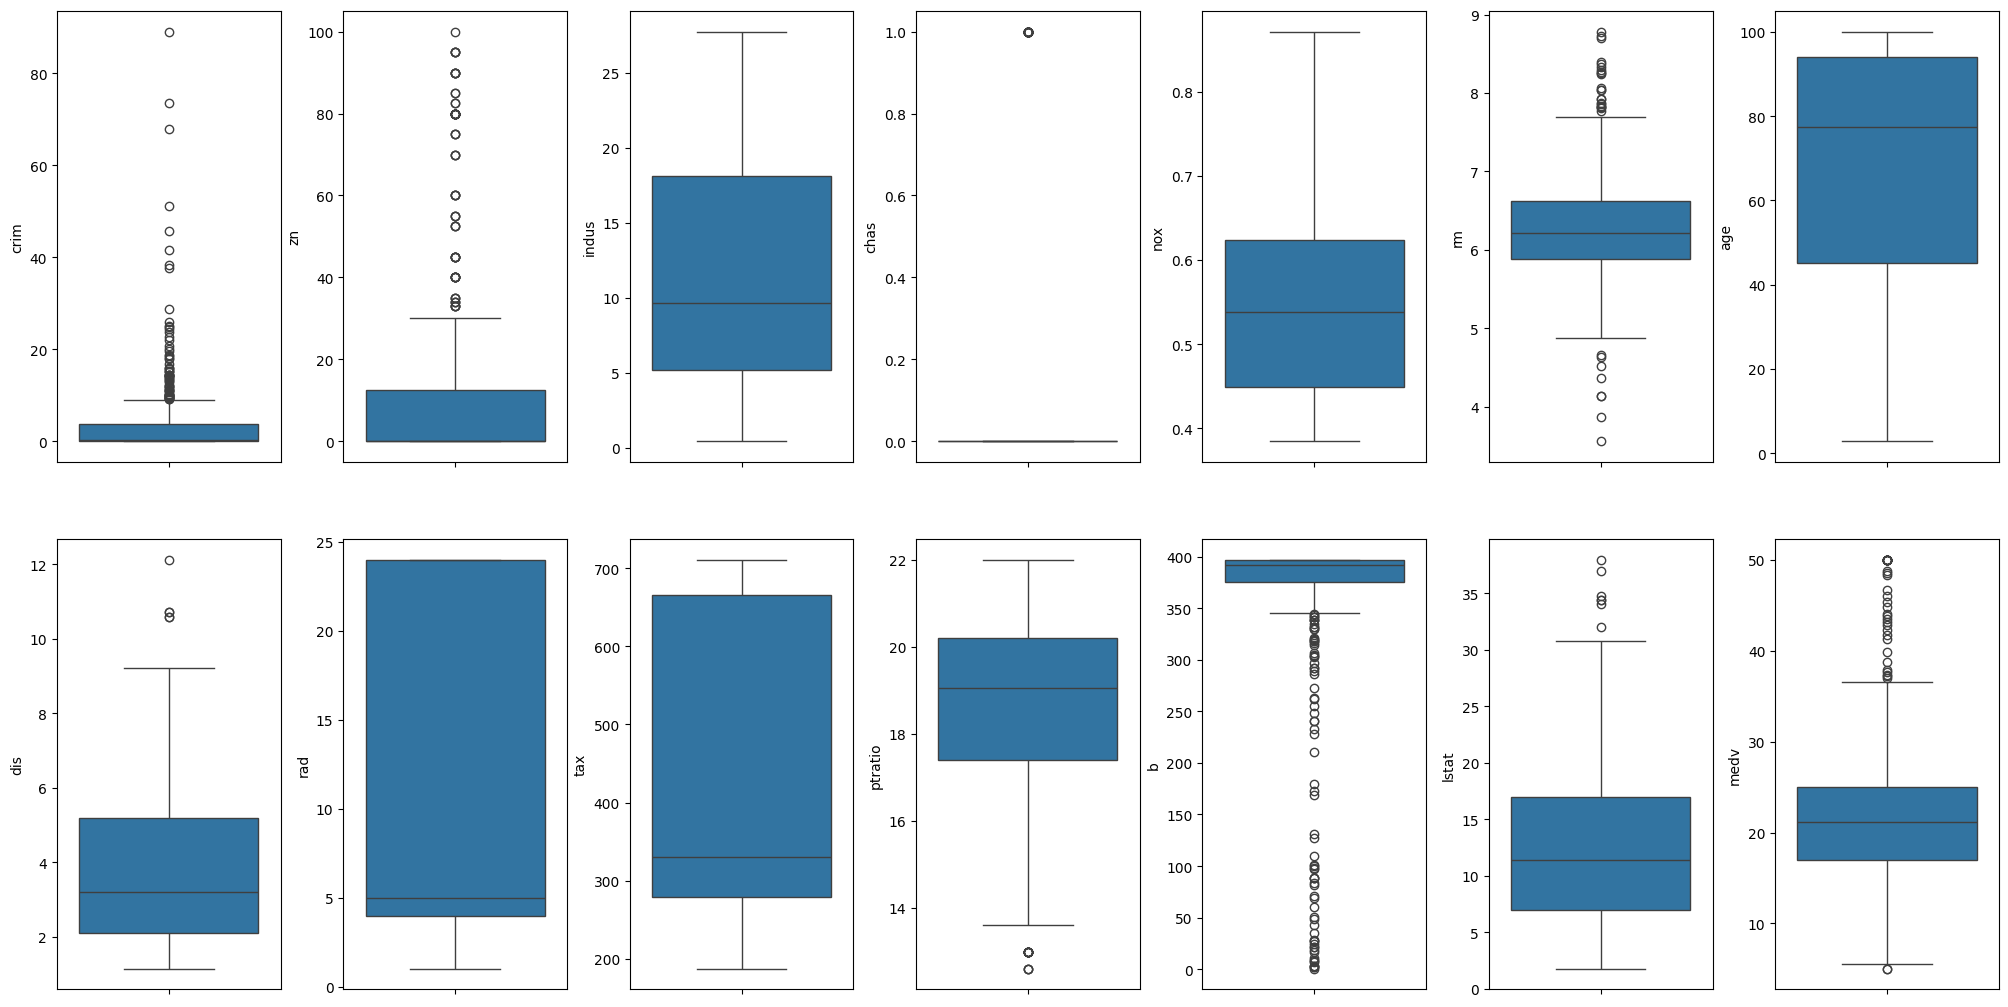

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Columns like CRIM, ZN, RM, B,medv,lstat and dis seems to have outliers. Let's see the number of outliers  in every column.


In [ ]:
columns_for_boxplots = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad','tax','ptratio','b','lstat','medv']
def count_outliers(data, column_name):
    """Counts outliers in a given column using the IQR method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Count and print outliers for each column
for column in columns_for_boxplots:
    num_outliers = count_outliers(df, column)
    print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'crim': 66
Number of outliers in 'zn': 68
Number of outliers in 'indus': 0
Number of outliers in 'chas': 35
Number of outliers in 'nox': 0
Number of outliers in 'rm': 30
Number of outliers in 'age': 0
Number of outliers in 'dis': 5
Number of outliers in 'rad': 0
Number of outliers in 'tax': 0
Number of outliers in 'ptratio': 15
Number of outliers in 'b': 77
Number of outliers in 'lstat': 7
Number of outliers in 'medv': 40


Let remove the outliers

In [3]:

# Fonction pour supprimer les valeurs aberrantes en utilisant l'IQR
def supprimer_valeurs_aberrantes(df, colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    seuil_inférieur = Q1 - 1.5 * IQR
    seuil_supérieur = Q3 + 1.5 * IQR
    df_filtré = df[(df[colonne] >= seuil_inférieur) & (df[colonne] <= seuil_supérieur)]
    return df_filtré

# Liste des colonnes à traiter
colonnes = ['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat', 'medv']

# Appliquer la fonction à chaque colonne
for colonne in colonnes:
    df = supprimer_valeurs_aberrantes(df, colonne)

# Réinitialiser les index après la suppression
df = df.reset_index(drop=True)

# Afficher les dimensions du DataFrame après la suppression des valeurs aberrantes
print("Dimensions du DataFrame après suppression des valeurs aberrantes :", df.shape)


Dimensions du DataFrame après suppression des valeurs aberrantes : (255, 14)


Anayse exploratoire

Let's see the barplot of rad and chas

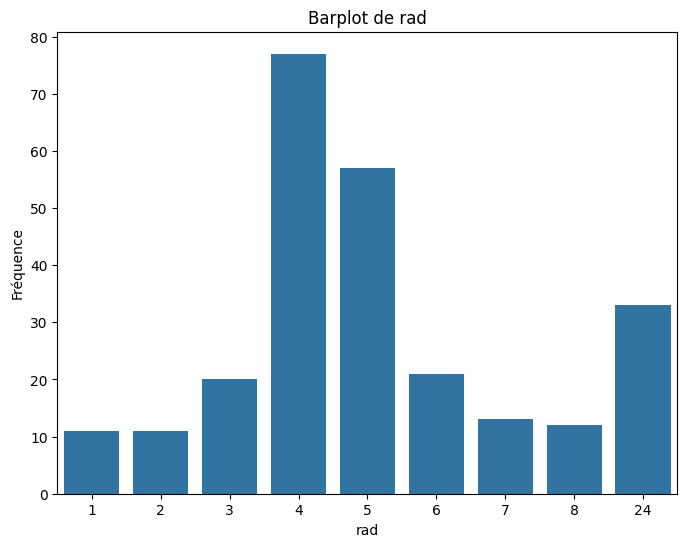

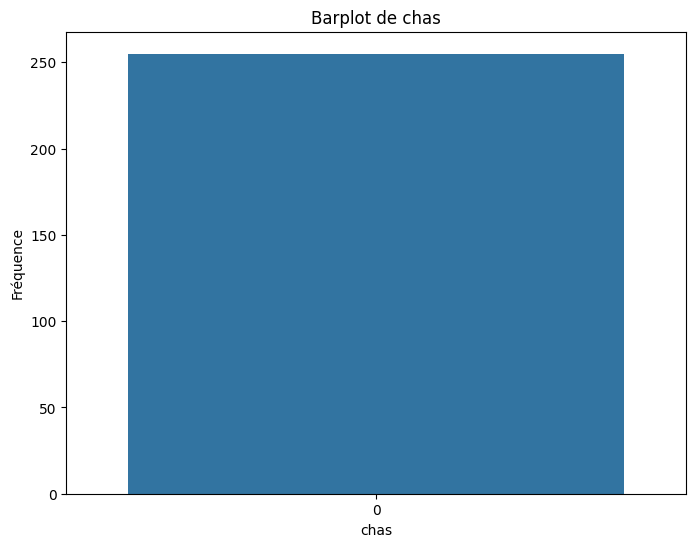

In [11]:
# Barplot pour 'rad'
plt.figure(figsize=(8, 6))
sns.countplot(x='rad', data=df)
plt.title('Barplot de rad')
plt.xlabel('rad')
plt.ylabel('Fréquence')
plt.show()

# Barplot pour 'chas'
plt.figure(figsize=(8, 6))
sns.countplot(x='chas', data=df)
plt.title('Barplot de chas')
plt.xlabel('chas')
plt.ylabel('Fréquence')
plt.show()

Indices 4 and 5 are the most common, suggesting that many areas have a medium level of accessibility.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
Dominant Value 0: The single bar represents the value 0 of "chas" and has a high frequency (approximately 250). This means there's a large number of houses that are not located near the Charles River.
Absence of Value 1: The absence of a bar for the value 1 of "chas" indicates that there are no (or very few) houses in the dataset that are located near the Charles River.

<ipython-input-10-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-10-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-10-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be 

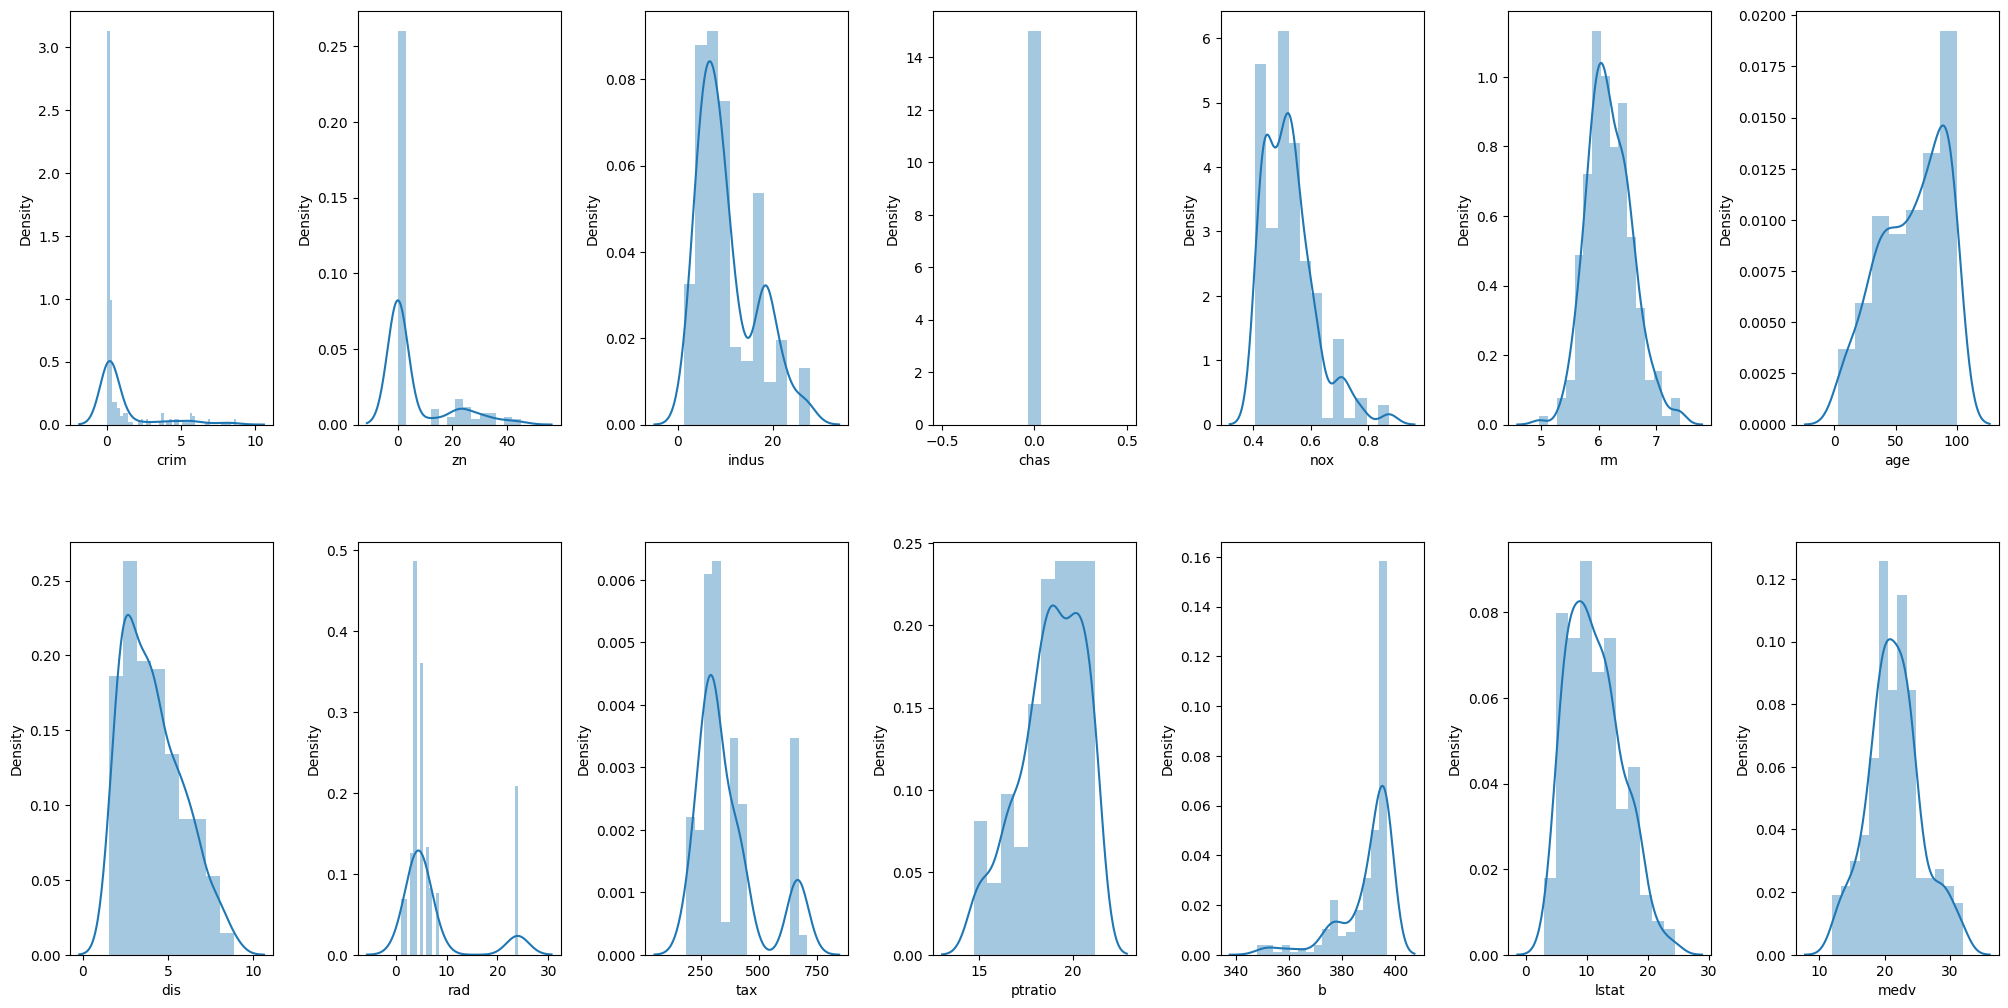

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data

<Axes: >

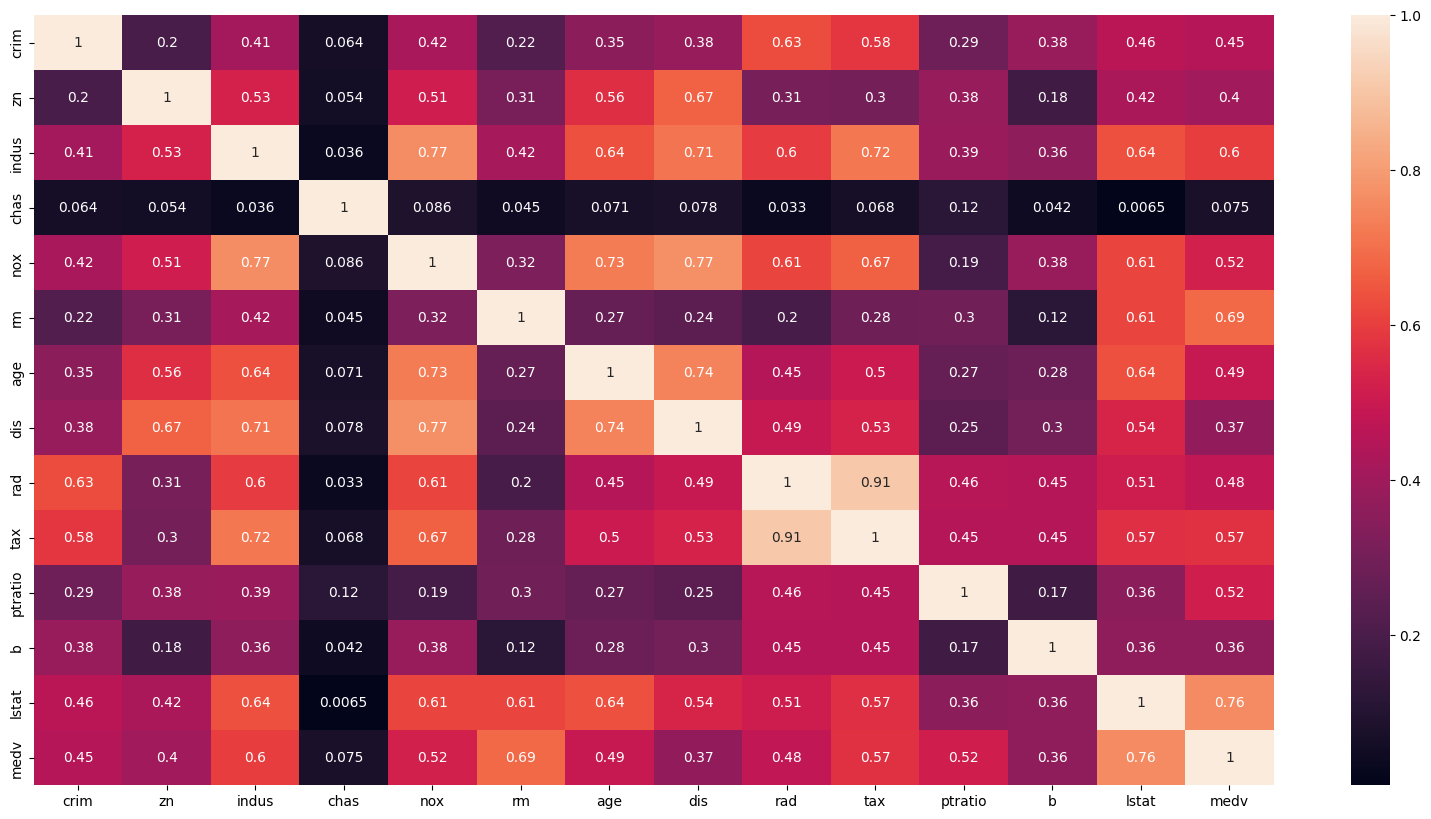

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV

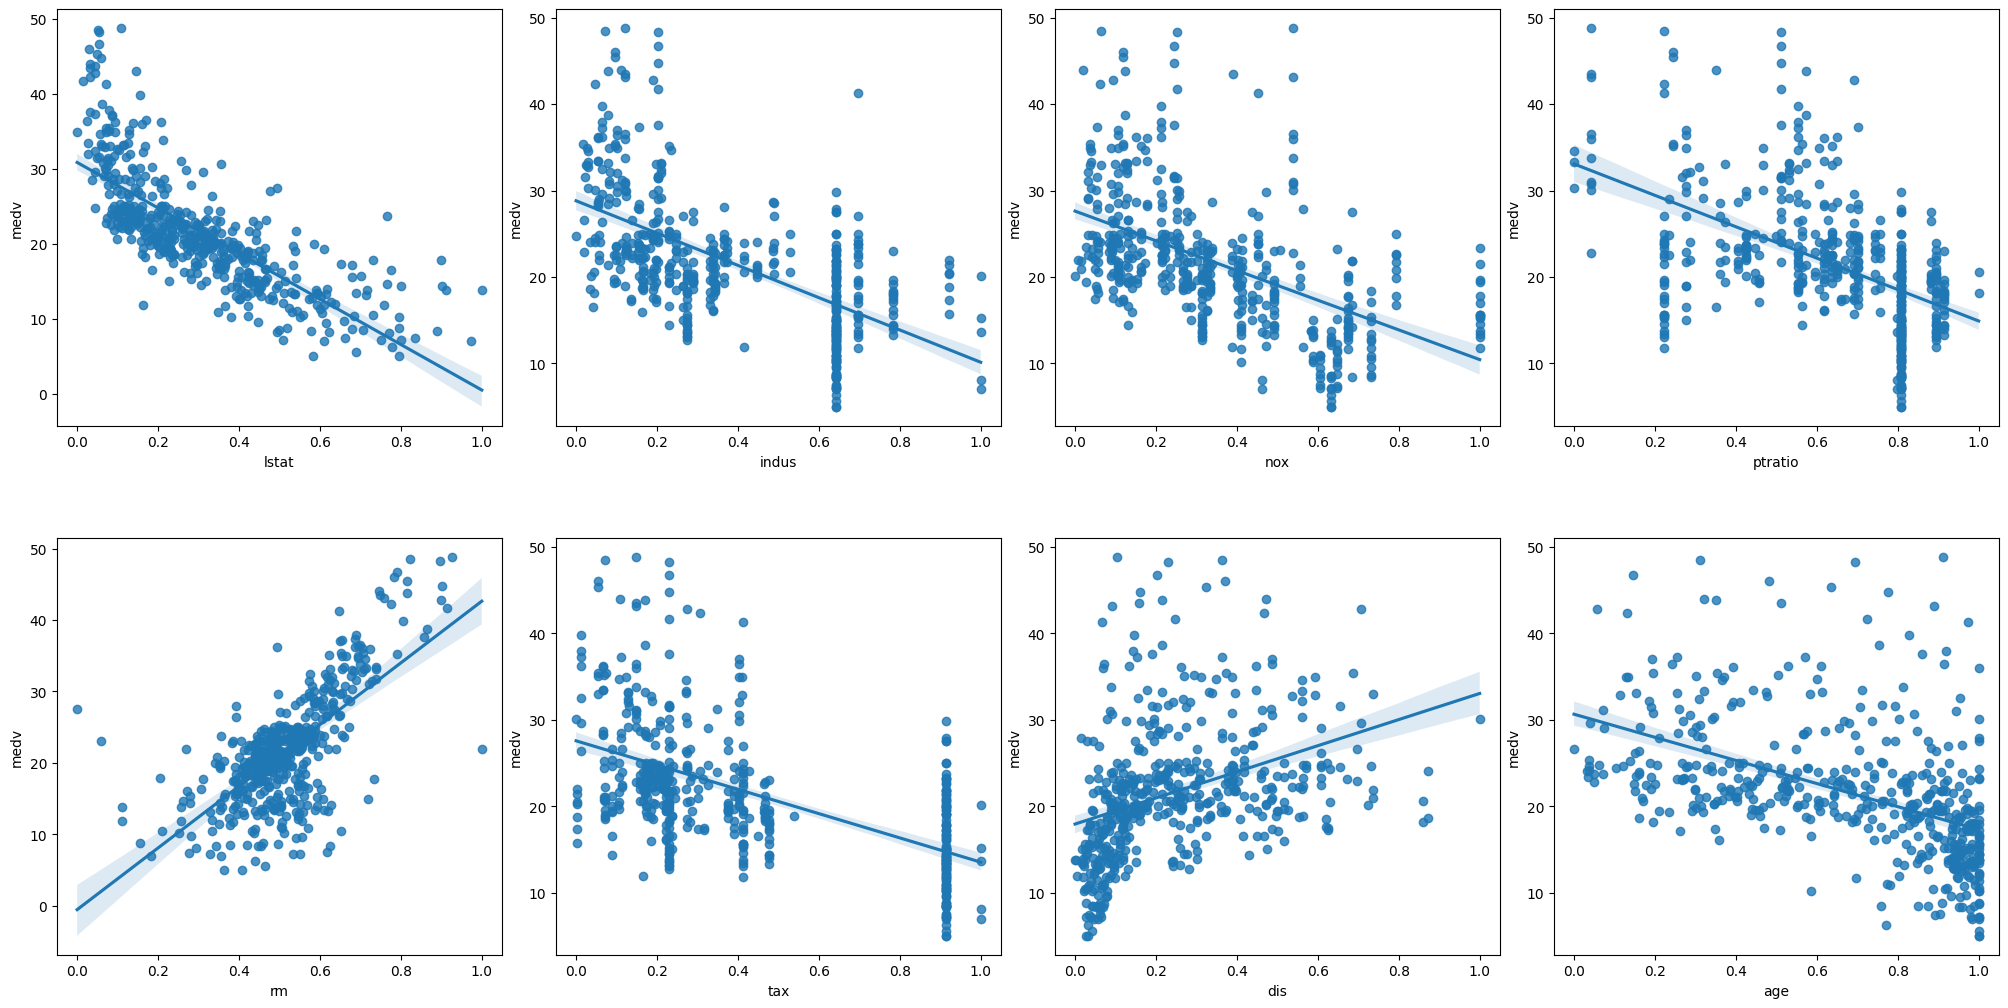

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age'] # Changed column names to lowercase
x = df.loc[:,column_sels]
y = df['medv'] # Changed column name to lowercase
x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=column_sels) # Removed df= and passed data as first argument
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Let  try to predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features.

In [12]:
!pip install -q scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

df = pd.read_csv(csv_path)

#  Define X (feature) and y (target)
X = df.drop(columns=["medv"])  # Changed "MEDV" to "medv"
y = df["medv"]  # Changed "MEDV" to "medv"


In [13]:
#  Spliting data an train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (404, 13), X_test : (102, 13)
y_train : (404,), y_test : (102,)


In [14]:
#  Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

#  Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [15]:
#  Create and training model
!pip install -q statsmodels
import statsmodels.api as sm # Import statsmodels and assign it to 'sm'
model = LinearRegression()
model.fit(X_train, y_train)

#  Prediction on test data
y_pred = model.predict(X_test)

#  add  a constant for intercept
X_train_sm = sm.add_constant(X_train) # Now 'sm' is defined and can be used

#  create linear regression model with statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()

#  Afficher le résumé statistique complet
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.12
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.01e-108
Time:                        14:07:08   Log-Likelihood:                -1194.8
No. Observations:                 404   AIC:                             2418.
Df Residuals:                     390   BIC:                             2474.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3399      5.693      5.330      0.0

In [16]:
#  Evaluation of model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE) : {mse:.2f}")
print(f" Coefficient de détermination (R²) : {r2:.2f}")

 Mean Squared Error (MSE) : 24.38
 Coefficient de détermination (R²) : 0.67


The model is not perfect: It explains 67% of price variations, which is acceptable but not excellent.
The MSE is relatively high, meaning the average prediction error is significant.

1.2 Group Discussion: Regression vs. Classification


1.3.1 Decision Tree for Regression: Boston Housing Dataset


Loading the dataset again of Boston Housing

In [ ]:
import os
import pandas as pd
import kagglehub

# Download latest version
dataset_dir = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_dir, filename)
        break  # Stop once the CSV file is found

print("Path to dataset files:", csv_path)

# Load the dataset into a pandas DataFrame called 'df'
df = pd.read_csv(csv_path)

# Now you can save it to a CSV file
chemin_fichier = "boston_housing.csv"
df.to_csv(chemin_fichier, index=False)
df.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/arunjangir245/boston-housing-dataset/versions/2/BostonHousing.csv


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let's split the data

In [ ]:
#  Spliting data an train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (404, 13), X_test : (102, 13)
y_train : (404,), y_test : (102,)


In [ ]:
#Create and train the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

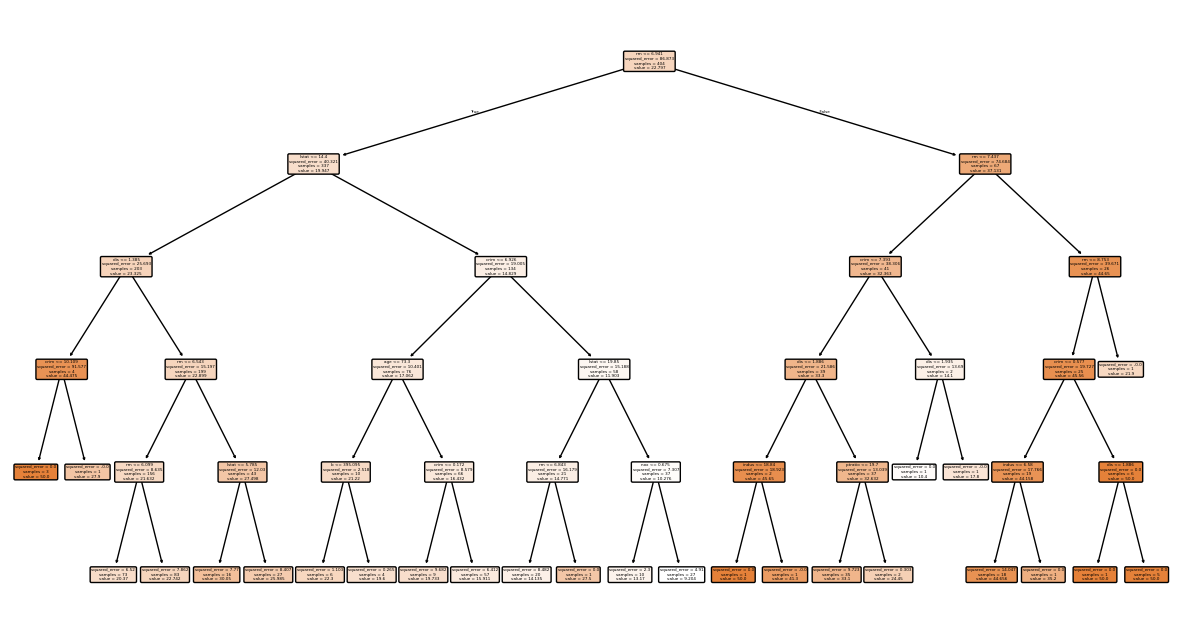

In [ ]:
# Plot the Decision Tree (Graphical Representation)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()


In [ ]:
# Exportation of  Decision Tree as an Image (Graphviz)
from sklearn.tree import export_graphviz
import graphviz

# Export the tree in Graphviz format
dot_data = export_graphviz(
    regressor, out_file=None, feature_names=X_train.columns, filled=True, rounded=True
)

# Render the graph
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf'
graph.view()  # Opens the generated image


'decision_tree.pdf'

In [ ]:
# Predictions on the test set
y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(results.head(10))

   Actual  Predicted
0    23.6  22.742169
1    32.4  30.050000
2    13.6  19.733333
3    22.8  20.369863
4    16.1  15.910526
5    20.0  22.742169
6    17.8  15.910526
7    14.0  15.910526
8    19.6  22.742169
9    16.8  20.369863


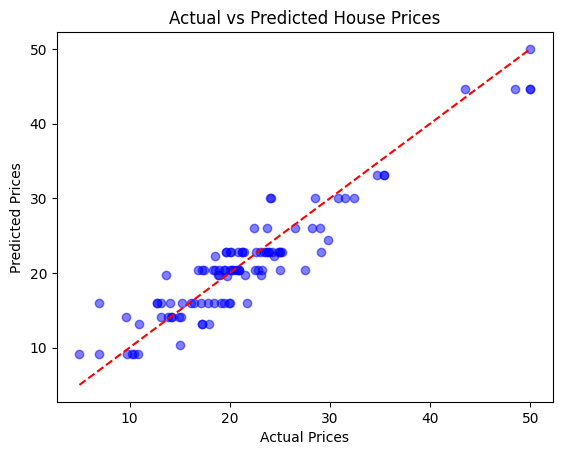

In [ ]:
# Visualizing Predictions with Matplotlib
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.show()


The model appears to capture the relationship between actual and predicted prices well since the points roughly follow the red line.
There is some spread in the data, indicating prediction errors.
This graph suggests that the model performs reasonably well but has some deviations.

In [ ]:
# Calculate the mean squared error and print rmse

import numpy as np # Import numpy at the top
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f" Mean Squared Error : {mse:.2f}")
print(f" Root Mean Squared Error : {rmse:.2f}")

 Mean Squared Error : 8.75
 Root Mean Squared Error : 2.96


An RMSE of 2.96 suggests that the model is performing reasonably well but still has some error.
MSE measures the average squared difference between actual values (y_test) and predicted values (y_pred).
A lower MSE (8.75) indicates that the model's predictions are closer to the actual values